In [45]:
# Importamos Bibliotecas

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Carga de datos desde un archivo CSV

In [48]:
datos = pd.read_csv('G:/Mi unidad/Courses/Python + Excel con PY/kmeans/centrocomercial.csv', delimiter = ';', index_col = 'ID')

In [49]:
# Descripción de los datos

In [50]:
datos.describe(include='all')

,Genero,Edad,IngresoAnual,ScoreGasto
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Femenino,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [51]:
# Preprocesamiento de datos categóricos:
# Convertir la variable categórica 'Genero' en variables dummy/indicadoras.
# 'drop_first=True' omite la primera categoría alfabética para evitar la multicolinealidad,
# lo que significa que 'Femenino' será representado como 0 y 'Masculino' como 1.

In [52]:
datos_preprocesados = pd.get_dummies(datos, columns=['Genero'], drop_first=True)

In [53]:
datos_preprocesados.describe()

,Edad,IngresoAnual,ScoreGasto,Genero_Masculino
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.440000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


In [54]:
# Estandarización de los datos numéricos:
# Inicializar un objeto StandardScaler

In [55]:
estandarizar = StandardScaler()

In [56]:
# Aplicar la estandarización

In [57]:
datos_std = estandarizar.fit_transform(datos_preprocesados)

In [58]:
# Los datos están ahora preprocesados y estandarizados, listos para el análisis de clusters.

In [59]:
datos_std

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [60]:
# Describamos los datos, hay que convertirlos a dataframe porque son un array
# Notemos que todos tienen media 0 y desviación estándar 1

In [61]:
pd.DataFrame(datos_std).describe()

,0,1,2,3
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16,3.108624e-17
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00,-8.864053e-01
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01,-8.864053e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03,-8.864053e-01
75%,7.284319e-01,6.656748e-01,8.851316e-01,1.128152e+00
max,2.235532e+00,2.917671e+00,1.894492e+00,1.128152e+00


In [62]:
# Cálculo del WCSS para diferentes números de clusters
# WCSS: Suma de las Distancias al Cuadrado Dentro del Clúster

In [63]:
# Inicialización de la lista WCSS: Esta línea crea una lista vacía llamada wcss, que se utilizará para almacenar 
# los valores de la suma de las distancias al cuadrado dentro del cluster (WCSS) para diferentes números de clusters.

In [64]:
wcss = []

In [ ]:
# Bucle for para ajustar el modelo KMeans: Este bucle iterará 10 veces, comenzando en 1 y terminando en 10. 
# En cada iteración, se va a calcular el WCSS para un número diferente de clusters. 

# Dentro del bucle, se inicializa # el modelo KMeans con n_clusters=i, donde i es el número actual de clusters 
# en la iteración del bucle. 
# El parámetro init="k-means++" es una estrategia para inicializar los centros de los clusters de una manera 
# que acelere la convergencia del algoritmo. random_state=99 se utiliza para asegurar que la inicialización de los
# clusters sea reproducible; es decir, cada vez que se ejecute el código con el mismo random_state, el resultado será el mismo.

# kmedias.fit(datos_std) ajusta el modelo KMeans al conjunto de datos datos_std. Esto implica que el algoritmo 
# KMeans va a buscar i clusters dentro del conjunto de datos proporcionado.

# Después de ajustar el modelo KMeans a los datos, kmedias.inertia_ devuelve el WCSS, que es la suma de las distancias
# al cuadrado de cada punto de datos hasta el centro del cluster más cercano. Este valor se añade a la lista wcss 
# que inicializamos antes con el método append. 

In [65]:
for i in range(1,11):
    kmedias = KMeans(n_clusters=i, init="k-means++", random_state=99)
    kmedias.fit(datos_std)
    wcss.append(kmedias.inertia_)

In [ ]:
# Configuración del gráfico del método del codo

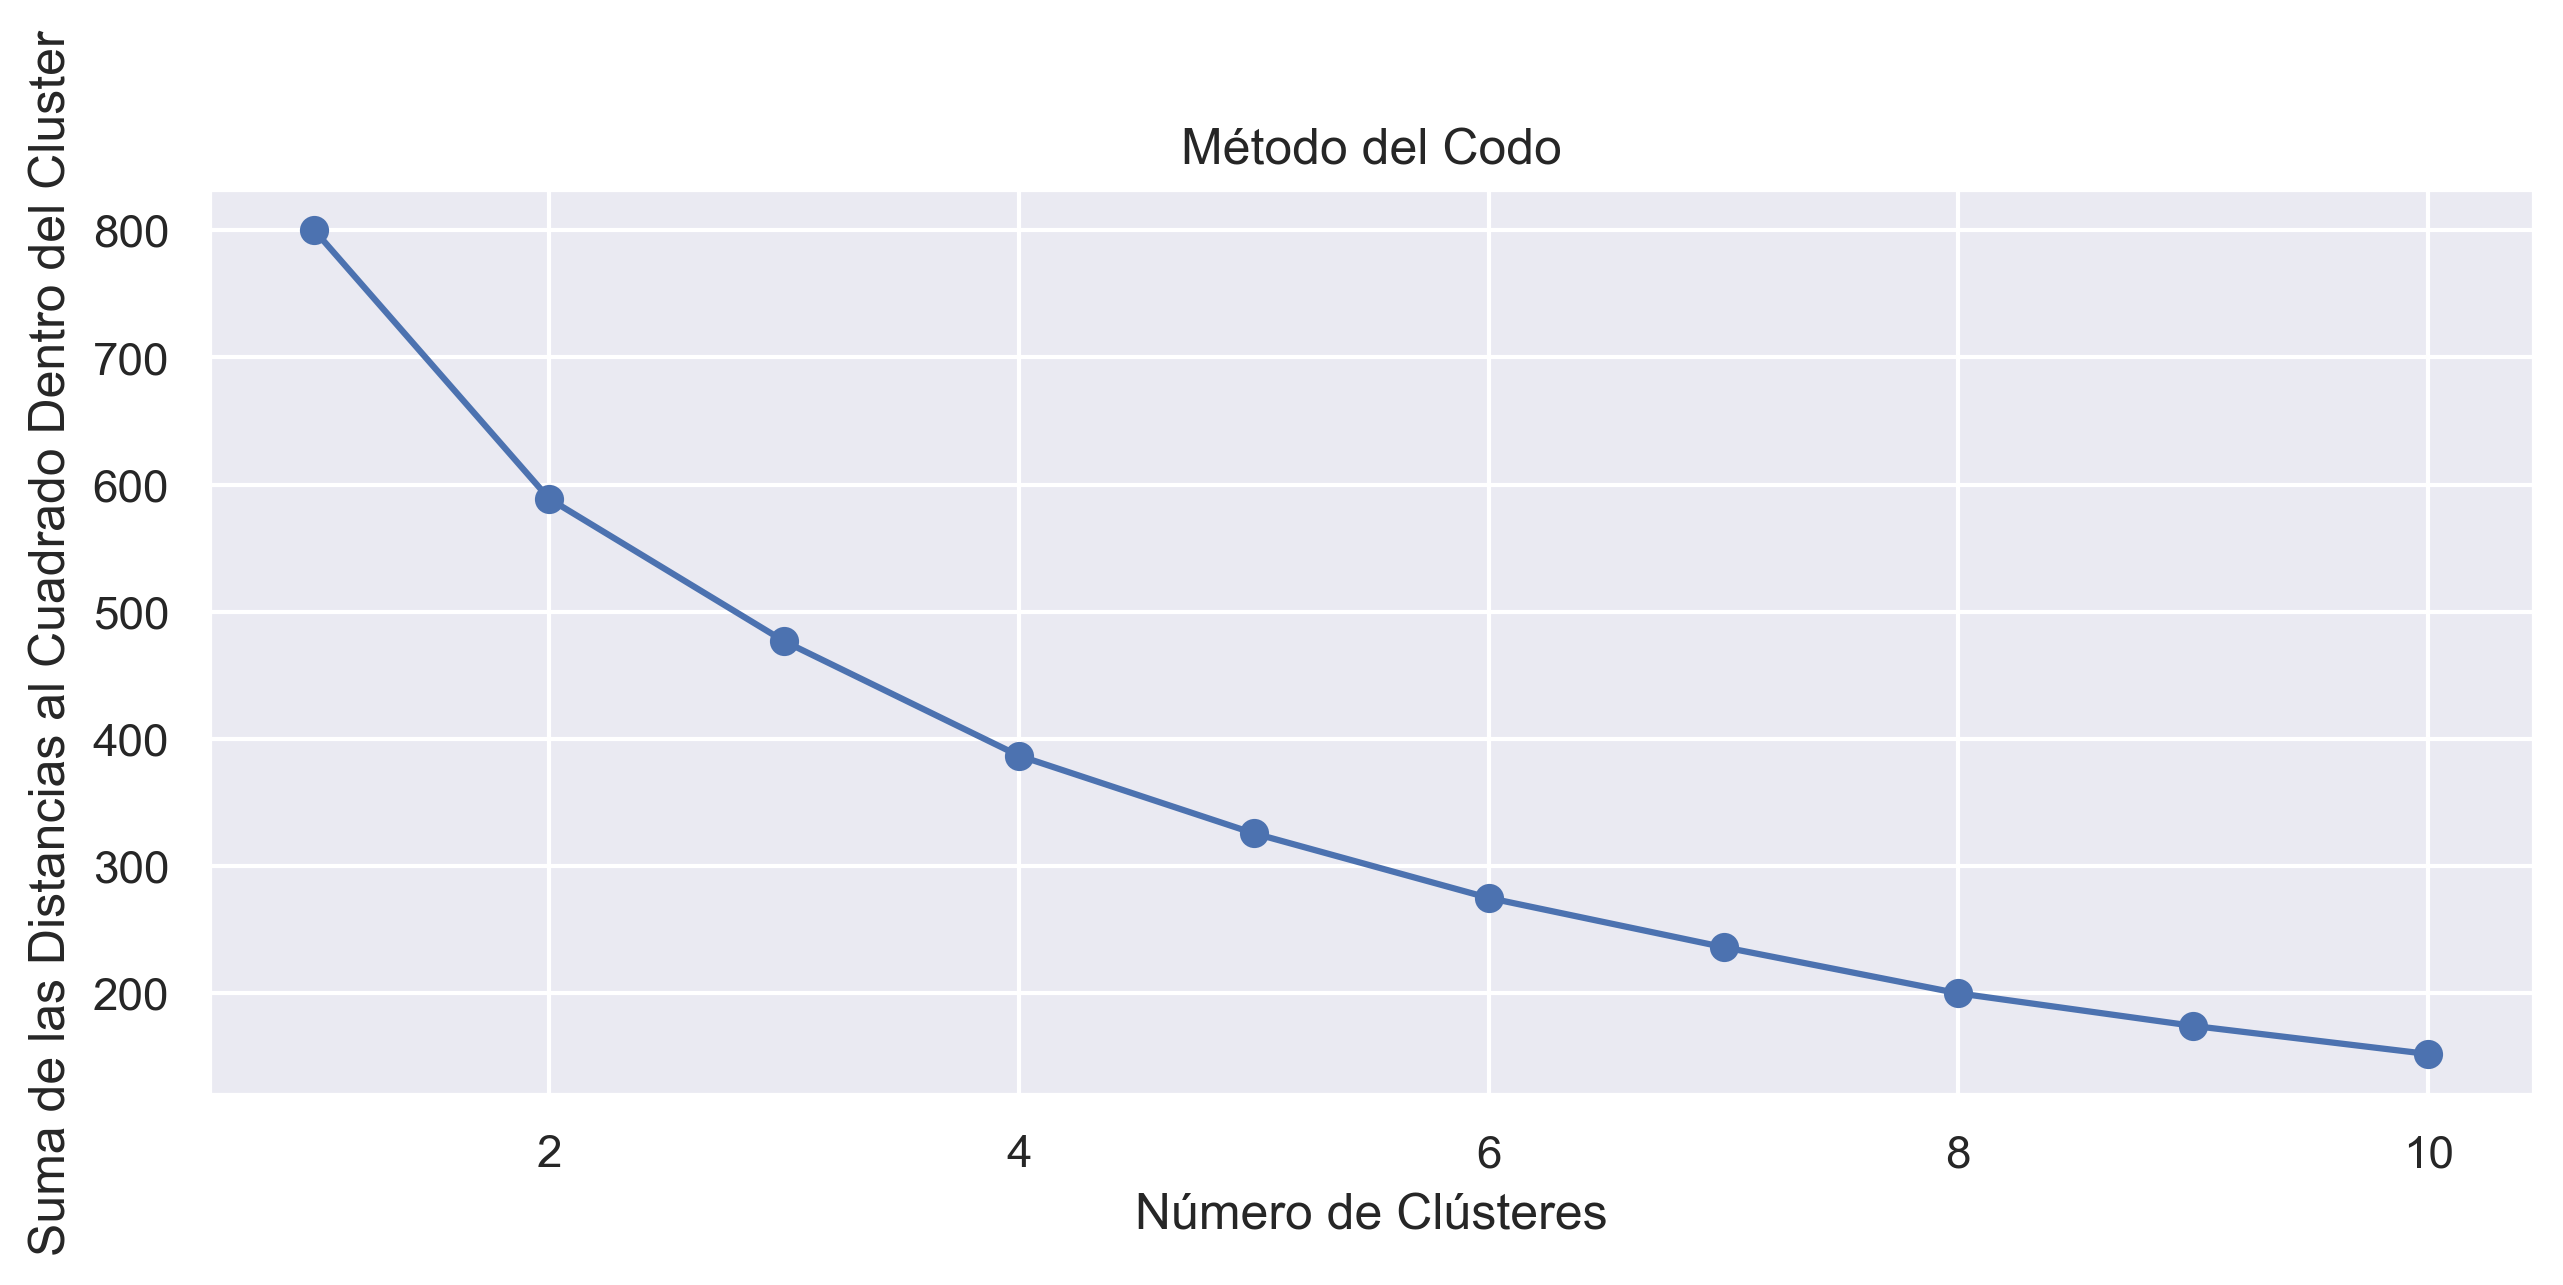

In [67]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,4), dpi=300)
plt.plot(range(1,11), wcss, marker = "o")
plt.xlabel("Número de Clústeres")
plt.ylabel("Suma de las Distancias al Cuadrado Dentro del Cluster")
plt.title("Método del Codo")
plt.show()